In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
from tensorflow.keras import regularizers
import os
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
mylist= os.listdir('C:\\Users\Kalelt\'has\Desktop\Stage\Sound Data\Raw Data')
type(mylist)

list

In [4]:
len(mylist)

2932

In [5]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='03':
        feeling_list.append('happy')
    elif item[6:-16]=='04':
        feeling_list.append('sad')
    elif item[6:-16]=='05':
        feeling_list.append('angry')
    elif item[6:-16]=='06':
        feeling_list.append('fearful')
    elif item[6:-16]=='07':
        feeling_list.append('disgust')
    elif item[6:-16]=='08':
        feeling_list.append('surprised')
    elif item[6:-16]=='01':
        feeling_list.append('neutral')
    elif item[:1]=='a':
        feeling_list.append('angry')
    elif item[:1]=='f':
        feeling_list.append('fearful')
    elif item[:1]=='h':
        feeling_list.append('happy')
    elif item[:1]=='n':
        feeling_list.append('neutral')
    elif item[:1]=='d':
        feeling_list.append('disgust')
    elif item[:2]=='su':
        feeling_list.append('surprised')
    elif item[:2]=='sa':
        feeling_list.append('sad')

In [6]:
labels = pd.DataFrame(feeling_list)
labels = labels.rename(columns={0: 'label'})
len(labels)

2556

In [7]:
import seaborn as sns
# Plotting the emotion distribution

def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    """
    To plot the data distributioin by class.
    Arg:
      dist: pandas series of label count. 
    """
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

angry        436
fearful      436
sad          436
happy        436
neutral      308
disgust      252
surprised    252
Name: label, dtype: int64


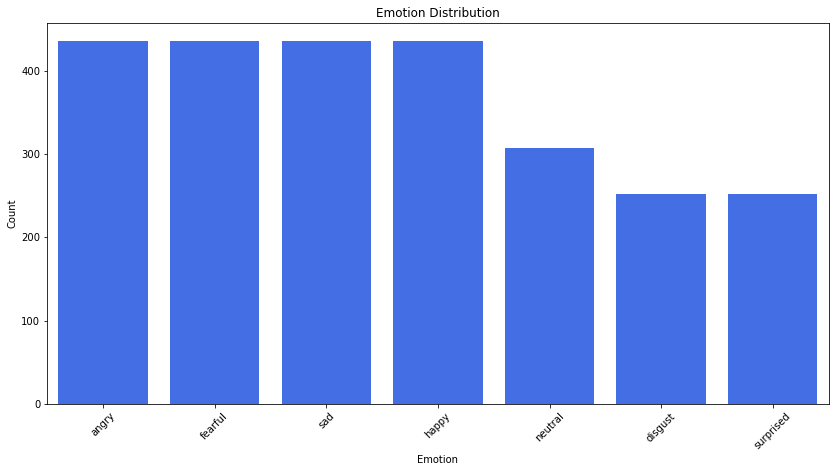

In [8]:
plot = labels.label.value_counts()
print(plot)
plot_emotion_dist(plot, "#2962FF", "Emotion Distribution")

In [9]:
labels.label

0         neutral
1         neutral
2         neutral
3         neutral
4         neutral
          ...    
2551    surprised
2552    surprised
2553    surprised
2554    surprised
2555    surprised
Name: label, Length: 2556, dtype: object

In [10]:
#Prepare the dict
my_dict = {}
i=0
for i in range(216):
    my_dict[i] = []

In [11]:
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='02':
        X, sample_rate = librosa.load('C:\\Users\Kalelt\'has\Desktop\Stage\Sound Data\Raw Data\\'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=12).T
        for i in range(len(mfccs)):
            my_dict[i].append(mfccs[i])

In [12]:
df = pd.DataFrame.from_dict(my_dict, orient='index').T

In [13]:
xd = df
for i in range(len(df)):
    for j in range(216):
        if xd.iloc[i,j] is None:
            xd.iloc[i,j] = np.zeros(12)

In [14]:
newdf = pd.concat([xd,labels], axis=1)
newdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
0,"[-855.4126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-855.4126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-855.4126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-855.4126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-855.4126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-855.4126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-855.4126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-855.4126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-855.4126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-855.4126, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"[-852.7659, 3.7398262, 3.7303648, 3.7146397, 3...","[-854.7548, 0.9293566, 0.9270228, 0.9231334, 0...","[-855.0615, 0.49615216, 0.49515492, 0.49349436...","[-854.1553, 1.7768778, 1.7735907, 1.7681226, 1...","[-854.2701, 1.6132803, 1.6062467, 1.5947204, 1...","[-854.79333, 0.8751819, 0.8735771, 0.87091243,...","[-853.399, 2.8447864, 2.8360765, 2.8216248, 2....","[-854.20074, 1.7127061, 1.7094843, 1.7041247, ...","[-853.0279, 3.359327, 3.3201904, 3.2559023, 3....",neutral
1,"[-821.7846, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-821.7846, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-821.7846, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-821.7846, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-821.7846, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-821.13354, -0.45227766, -0.4762841, 0.919759...","[-812.50635, -1.3923113, -2.837748, 10.556901,...","[-812.2545, 0.47208667, -1.3423647, 9.645514, ...","[-820.55914, 0.5437228, 0.2414756, 1.0925915, ...","[-821.62164, -0.108744904, -0.12704813, 0.2273...",...,"[-804.8696, 23.238768, 21.388206, 18.740921, 1...","[-802.52905, 25.882265, 22.24023, 17.351395, 1...","[-802.88104, 25.116793, 20.99273, 15.970868, 1...","[-805.04504, 22.240238, 18.569805, 14.087547, ...","[-804.15796, 22.135447, 15.313034, 7.9197245, ...","[-804.4919, 22.181942, 16.381016, 9.514078, 4....","[-805.3632, 21.638456, 17.417744, 11.918913, 6...","[-803.8157, 24.056448, 20.318403, 15.074839, 9...","[-810.08716, 15.698001, 13.357195, 10.0368, 6....",neutral
2,"[-783.3624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-783.3624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-783.3624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-783.3624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-783.3624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-783.3624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-783.3624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-783.3624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-783.3624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-783.3624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,"[-768.4601, 19.58313, 16.457134, 14.096729, 13...","[-766.63574, 22.676502, 20.294708, 17.63641, 1...","[-761.7448, 29.168606, 25.644545, 21.469763, 1...","[-763.19244, 27.045345, 23.24071, 18.607624, 1...","[-770.62866, 17.464836, 15.928329, 13.6533165,...","[-772.97015, 14.067352, 12.330967, 9.887375, 7...","[-766.97754, 21.83543, 18.301792, 13.719212, 9...","[-764.3447, 25.480705, 21.830109, 17.265268, 1...","[-765.27563, 24.268303, 21.179089, 17.718077, ...",neutral
3,"[-864.34515, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[-864.34515, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[-864.34515, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[-864.34515, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[-864.34515, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[-864.34515, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[-860.83636, -4.710763, 3.9831913, -2.8565996,...","[-856.79315, -10.1305, 8.542254, -6.089765, 3....","[-860.0415, -5.7772565, 4.8832717, -3.4995217,...","[-864.34515, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",...,"[-853.5374, 14.629644, 12.938563, 10.728258, 8...","[-856.2662, 10.81254, 9.174643, 6.937224, 4.44...","[-860.00793, 5.4010243, 3.4921875, 1.1485866, ...","[-861.66724, 3.5617552, 3.0976498, 2.7365787, ...","[-857.03516, 8.817564, 5.746298, 3.6268888, 2....","[-855.90045, 11.213295, 9.260658, 6.647816, 3....","[-855.6426, 11.319319, 8.957191, 6.4642467, 4....","[-860.6173, 5.0931444, 4.592247, 3.8

In [15]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,label
2521,"[-496.76712, 31.271992, 27.198406, 21.494696, ...","[-492.37686, 37.228104, 32.43861, 25.682755, 1...","[-489.60153, 40.698624, 34.740936, 26.58688, 1...","[-491.94873, 37.578514, 32.061386, 24.23109, 1...","[-490.73798, 39.39726, 34.172623, 26.736, 18.5...","[-492.5524, 36.842293, 31.738192, 24.716717, 1...","[-492.7633, 36.649918, 31.77442, 24.910816, 17...","[-490.26892, 39.890995, 34.249504, 26.38288, 1...","[-490.146, 40.153194, 34.774258, 27.307104, 19...","[-493.20538, 36.06829, 31.307842, 24.59076, 17...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",surprised
776,"[-713.93286, 61.049072, 13.8733635, 29.579771,...","[-722.0853, 59.927254, 17.149971, 24.275846, 3...","[-735.17065, 50.955055, 14.183012, 17.443724, ...","[-741.48425, 48.129997, 16.449556, 15.31377, 2...","[-727.93604, 53.29362, 7.999213, 13.963708, 28...","[-718.64905, 56.576496, 1.8556322, 13.412949, ...","[-714.5063, 58.677437, -2.7600968, 10.569329, ...","[-726.43024, 50.676247, -0.4593429, 12.337333,...","[-748.3313, 41.65054, 13.600557, 14.876021, 29...","[-765.7199, 30.452763, 18.811678, 15.219877, 1...",...,"[-689.41095, 86.58216, 5.171112, -3.117579, 17...","[-709.6174, 74.40654, 10.773499, 0.69532037, 1...","[-733.65485, 56.745834, 17.080437, 9.706935, 1...","[-748.5231, 48.315636, 27.961443, 22.159208, 2...","[-753.17456, 45.72464, 29.306944, 19.904867, 1...","[-758.8856, 39.942436, 27.982845, 22.0816, 20....","[-765.70935, 33.968616, 27.35603, 22.106358, 1...","[-767.41077, 31.83524, 26.238026, 22.378586, 2...","[-767.10156, 32.780014, 28.204529, 24.301315, ...",fearful
1349,"[-587.5345, -2.8720486, -12.558419, 7.08062, 7...","[-587.5081, -2.22676, -11.945736, 7.4478216, 8...","[-586.63257, -3.1284013, -13.62468, 8.362898, ...","[-586.63947, -3.5335155, -13.557854, 8.711845,...","[-588.8311, -1.9487345, -10.250934, 6.952609, ...","[-591.3227, -1.1529701, -7.266143, 4.9413843, ...","[-592.5418, -0.23216408, -4.8418484, 4.2452307...","[-590.3586, 0.07090867, -5.4192934, 7.0970173,...","[-589.0062, -1.9018729, -9.228389, 7.56669, 6....","[-587.0895, -1.702589, -9.336509, 9.844554, 6....",...,"[-274.27777, 109.834854, -58.95273, -18.723331...","[-282.97998, 88.9328, -53.705456, -2.5085034, ...","[-292.87445, 83.338585, -55.394497, 4.9784904,...","[-293.31686, 85.88193, -65.561386, 4.960014, 1...","[-297.69852, 88.15161, -76.35922, 1.1501765, 8...","[-305.10852, 94.84383, -76.066025, 2.9670506, ...","[-524.4871, 172.19736, 47.50946, 54.71444, -24...","[-497.3349, 200.0136, 59.785065, 57.4128, -24....","[-465.64667, 220.94331, 60.447, 49.684357, -21...",happy
2340,"[-553.399, 83.77173, 34.90102, 34.278057, 33.8...","[-544.3823, 88.45181, 33.110733, 35.17581, 30....","[-493.8493, 136.02924, 50.216537, 50.345795, 4...","[-429.63336, 197.81017, 52.685356, 29.772839, ...","[-410.8479, 217.30917, 51.629612, 18.541967, 5...","[-431.31998, 203.53995, 59.163788, 27.824467, ...","[-482.29074, 168.66092, 73.99961, 37.809586, 4...","[-522.16187, 134.57848, 73.0145, 38.71186, 33....","[-545.13104, 114.2971, 71.32767, 39.904892, 28...","[-563.1671, 95.88721, 65.994675, 40.936058, 28...",...,"[-399.9201, 193.56389, 115.62196, 66.939445, 8...","[-519.854, 38.8964, 27.504597, 13.524971, 2.03...","[-536.6558, 50.42916, 44.56945, 36.213245, 26....","[-405.4281, 162.11479, 72.85392, 21.28218, -10...","[-428.26544, 120.96013, 76.569855, 52.0886, 40...","[-432.5252, 117.79469, 77.57428, 53.076313, 39...","[-440.02805, 30.27645, -5.519136, 79.44932, 16...","[-378.0776, 53.20069, -51

In [16]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]
len(train)

2041

In [17]:
train_features = train.iloc[:,:-1]
train_labels = train.iloc[:, -1:]
test_features = test.iloc[:,:-1]
test_labels = test.iloc[:, -1:]

fearful      93
happy        90
sad          82
angry        77
neutral      59
disgust      59
surprised    55
Name: label, dtype: int64


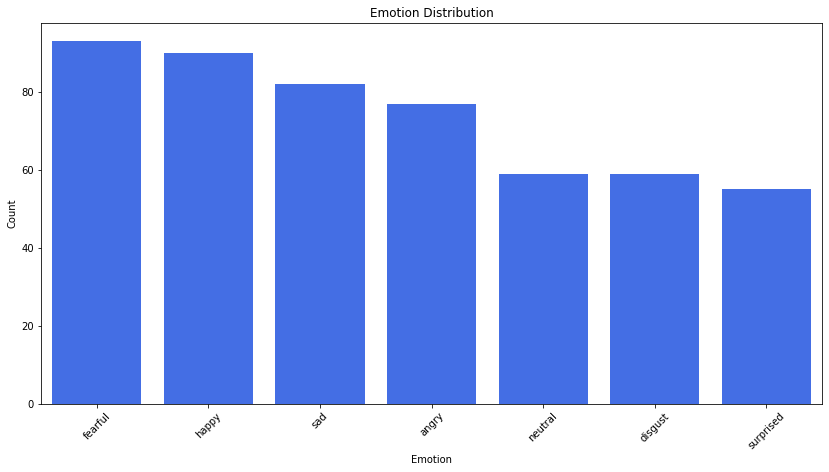

In [18]:
plot = test_labels.label.value_counts()
print(plot)
plot_emotion_dist(plot, "#2962FF", "Emotion Distribution")

In [19]:
#Reshaping train and test into 4d array
X_train = np.array(train_features)
X_train_cnn = np.zeros((len(X_train),216,12))
for i in range(len(X_train)):
    for j in range(216):
        for k in range(12):
            X_train_cnn[i,j,k] = X_train[i][j][k]
            
X_train_cnn = X_train_cnn.reshape(len(train_features),216,12,1)            
X_train_cnn.shape

(2041, 216, 12, 1)

In [20]:
#Normalize X train
Max = np.amax(X_train_cnn)
Min = np.amin(X_train_cnn)
X_train_cnn = (X_train_cnn - Min) / (Max-Min)

In [21]:
X_test = np.array(test_features)
X_test_cnn = np.zeros((len(X_test),216,12))
for i in range(len(X_test)):
    for j in range(216):
        for k in range(12):
            X_test_cnn[i,j,k] = X_test[i][j][k]
X_test_cnn = X_test_cnn.reshape(len(test_features),216,12,1)
X_test_cnn.shape

(515, 216, 12, 1)

In [22]:
#Normalize X test
Max = np.amax(X_test_cnn)
Min = np.amin(X_test_cnn)
X_test_cnn = (X_test_cnn - Min) / (Max-Min)

In [36]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
type(y_train)

numpy.ndarray

In [38]:
#Save np array to file
np.savetxt("lb_feature", y_train, fmt='%s')

In [24]:
y_test

array([['sad'],
       ['neutral'],
       ['surprised'],
       ['sad'],
       ['happy'],
       ['happy'],
       ['sad'],
       ['surprised'],
       ['angry'],
       ['angry'],
       ['surprised'],
       ['sad'],
       ['happy'],
       ['angry'],
       ['surprised'],
       ['happy'],
       ['sad'],
       ['sad'],
       ['angry'],
       ['surprised'],
       ['neutral'],
       ['surprised'],
       ['neutral'],
       ['happy'],
       ['happy'],
       ['happy'],
       ['disgust'],
       ['angry'],
       ['surprised'],
       ['happy'],
       ['fearful'],
       ['fearful'],
       ['neutral'],
       ['angry'],
       ['disgust'],
       ['angry'],
       ['happy'],
       ['happy'],
       ['fearful'],
       ['sad'],
       ['surprised'],
       ['happy'],
       ['angry'],
       ['happy'],
       ['surprised'],
       ['angry'],
       ['happy'],
       ['happy'],
       ['angry'],
       ['fearful'],
       ['neutral'],
       ['sad'],
       ['happy'],
    

In [25]:
#Label encoding the labels
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train))
y_test =  to_categorical(lb.fit_transform(y_test))

c:\users\kalelt'has\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [4]:
#Initializing the Model
model = Sequential()

model.add(Conv2D(20, kernel_size=5, padding="same", input_shape=(216, 12 ,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(10, kernel_size=5, padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(7))
model.add(Activation('softmax'))

model.summary()




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 216, 12, 20)       520       
_________________________________________________________________
activation_8 (Activation)    (None, 216, 12, 20)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 108, 6, 20)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 108, 6, 20)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 108, 6, 10)        5010      
_________________________________________________________________
activation_9 (Activation)    (None, 108, 6, 10)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 3, 10)        

In [165]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [166]:
cnnhistory = model.fit(X_train_cnn, y_train, batch_size=20, epochs=105, verbose=1, validation_data=(X_test_cnn, y_test))

Epoch 1/105
102/102 [==============================] - 30s 292ms/step - loss: 0.4092 - accuracy: 0.1884 - val_loss: 0.3955 - val_accuracy: 0.2220
Epoch 2/105
102/102 [==============================] - 29s 285ms/step - loss: 0.3804 - accuracy: 0.2709 - val_loss: 0.3917 - val_accuracy: 0.2799
Epoch 3/105
102/102 [==============================] - 29s 285ms/step - loss: 0.3692 - accuracy: 0.3013 - val_loss: 0.3650 - val_accuracy: 0.2934
Epoch 4/105
102/102 [==============================] - 29s 285ms/step - loss: 0.3498 - accuracy: 0.3626 - val_loss: 0.3415 - val_accuracy: 0.3842
Epoch 5/105
102/102 [==============================] - 29s 285ms/step - loss: 0.3367 - accuracy: 0.3876 - val_loss: 0.3650 - val_accuracy: 0.3263
Epoch 6/105
102/102 [==============================] - 29s 285ms/step - loss: 0.3301 - accuracy: 0.4048 - val_loss: 0.3448 - val_accuracy: 0.3436
Epoch 7/105
102/102 [==============================] - 29s 286ms/step - loss: 0.3245 - accuracy: 0.4176 - val_loss: 0.3260 -

Epoch 62/105
102/102 [==============================] - 35s 342ms/step - loss: 0.0746 - accuracy: 0.8989 - val_loss: 0.3479 - val_accuracy: 0.5985
Epoch 63/105
102/102 [==============================] - 34s 336ms/step - loss: 0.0662 - accuracy: 0.9092 - val_loss: 0.3658 - val_accuracy: 0.6120
Epoch 64/105
102/102 [==============================] - 35s 340ms/step - loss: 0.0633 - accuracy: 0.9082 - val_loss: 0.3653 - val_accuracy: 0.5714
Epoch 65/105
102/102 [==============================] - 35s 340ms/step - loss: 0.0773 - accuracy: 0.8921 - val_loss: 0.3576 - val_accuracy: 0.5714
Epoch 66/105
102/102 [==============================] - 36s 355ms/step - loss: 0.0699 - accuracy: 0.9068 - val_loss: 0.3944 - val_accuracy: 0.5618
Epoch 67/105
102/102 [==============================] - 37s 362ms/step - loss: 0.0606 - accuracy: 0.9146 - val_loss: 0.3767 - val_accuracy: 0.5946
Epoch 68/105
102/102 [==============================] - 38s 374ms/step - loss: 0.0578 - accuracy: 0.9161 - val_loss: 0

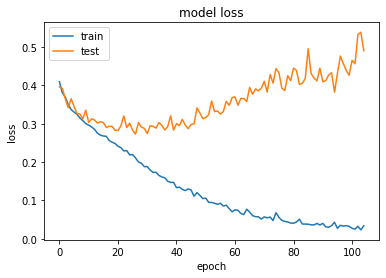

In [167]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [168]:
scores = model.evaluate(X_test_cnn, y_test)

17/17 [==============================] - 2s 108ms/step - loss: 0.4899 - accuracy: 0.6023


In [169]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 60.23%


In [145]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\Kalelt'has\Desktop\Stage\ASP\saved_models\Emotion_Voice_Detection_Model.h5 


In [152]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [51]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")

Loaded model from disk


In [52]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test_cnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 92.62%


In [47]:
preds = loaded_model.predict(X_test_cnn, 
                         batch_size=32, 
                         verbose=1)
preds1=preds.argmax(axis=1)
abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))
preddf = pd.DataFrame({'predictedvalues': predictions})
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))
actualdf = pd.DataFrame({'actualvalues': actualvalues})
finaldf = actualdf.join(preddf)
finaldf.groupby('actualvalues').count()


17/17 [==============================] - 1s 48ms/step


,predictedvalues
actualvalues,
angry,92
disgust,63
fearful,95
happy,86
neutral,62
sad,82
surprised,53


In [48]:
finaldf.groupby('predictedvalues').count()


,actualvalues
predictedvalues,
angry,88
disgust,61
fearful,94
happy,86
neutral,64
sad,86
surprised,54


In [28]:
data, sampling_rate = librosa.load('C:\\Users\Kalelt\'has\Desktop\Stage\ASP\saved_voice\\output10.wav')

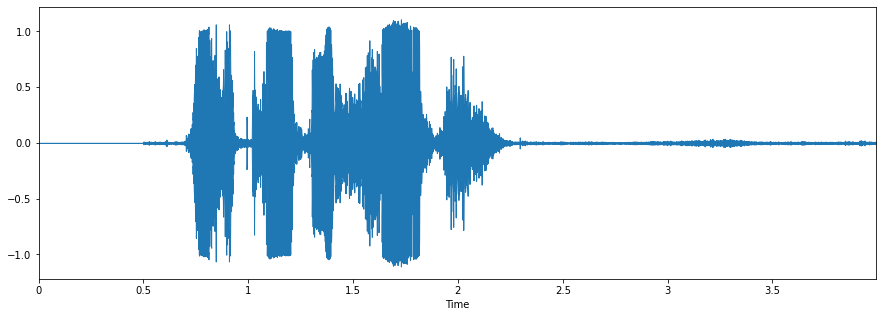

In [29]:
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [62]:
#Prepare the dict for the recorded sample
my_dict = {}
i=0
for i in range(216):
    my_dict[i] = np.zeros(12)

In [63]:
X, sample_rate = librosa.load('C:\\Users\Kalelt\'has\Desktop\Stage\ASP\saved_voice\\record_surprised.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=12).T
for i in range(len(mfccs)):
    my_dict[i] = mfccs[i]

In [64]:
df_record = pd.DataFrame.from_dict(my_dict, orient='index')

In [65]:
X_record = np.array(df_record)
X_record.shape

(216, 12)

In [67]:
X_record = X_record.reshape(1,216,12,1)

In [68]:
livepreds = loaded_model.predict(X_record, 
                         batch_size=32)

In [69]:
livepreds

array([[0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [70]:
livepreds1=livepreds.argmax(axis=1)
liveabc = livepreds1.astype(int).flatten()
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions


array(['fearful'], dtype=object)